In [6]:
import tensorflow as tf
import pandas as pd
import sklearn as sk
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import datetime, os
import random

In [7]:
data = pd.read_csv('Data/RSCI Clean.csv')
data.head()

,Player,WS/48,Composite.Rating,Age,Is.Big,Is.Guard
0,RJ Barrett,-0.015,1.117132,1,0,1
1,Marvin Bagley III,0.110,1.117132,1,1,0
2,Harry Giles,0.056,1.079960,2,1,0
3,Ben Simmons,0.162,1.117132,3,0,1
4,Jahlil Okafor,0.037,1.117132,2,1,0


In [8]:
player = data[['Player']]
data = data.drop(['Player'], axis = 1)
y = data[['WS/48']]
x = data.drop(['WS/48'], axis=1)
x.shape

(620, 4)

In [9]:
x_train, x_test, y_train, y_test = ms.train_test_split(data, y, test_size=0.33, random_state=42)

In [18]:
random.seed(223)
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(5,)),
  tf.keras.layers.Dense(64,activation='relu', input_shape=[len(x_train.keys())]),
tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(10, activation='softmax')
tf.keras.layers.Dense(1)
])

In [19]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

# log_dir = "logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,  histogram_freq=1,
#                                                      update_freq = 'epoch')

In [20]:
model.fit(x = x_train, 
          y = y_train,
          verbose = 0,
            validation_data=(x_test, y_test)
         #callbacks=[tensorboard_callback]
         )

In [21]:
# %load_ext tensorboard
# %tensorboard --logdir logs

In [22]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045


[0.004450042732059956, 0.004450042732059956]

In [23]:
preds = model.predict(x_test)

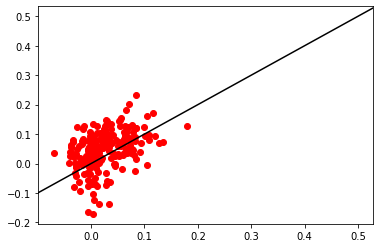

In [24]:
plt.plot(preds, y_test, 'ro')
plt.axline((0, 0), (1/2, 1/2), color='black')
plt.show()

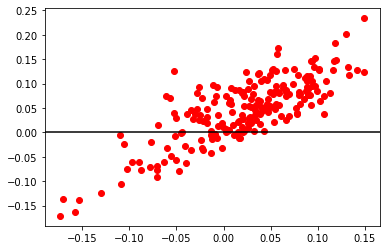

In [25]:
resid = y_test - preds
plt.plot(resid, y_test, 'ro')
plt.axhline(y=0, color = 'black', linestyle='-')
plt.show()